In [48]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tabulate import tabulate
import time
import math

In [144]:
class NonlinearFunctions:
    @staticmethod
    def sphere(x, dim):
        """Sphere function (unimodal)"""
        return np.sum(x**2)
    
    @staticmethod
    def elliptic(x, dim):
        """Elliptic function"""
        sum_val = 0
        for i in range(dim):
            sum_val += (10**(6*(i/(dim-1)))) * x[i]**2
        return sum_val
    
    @staticmethod
    def schwefeln2(x, dim):
        """Schwefel's N.2"""
        sum_val = 0
        for i in range(dim):
            sum_val += sum(x[:i+1]) ** 2
        return sum_val

        
    @staticmethod
    def rosenbrock(x, dim):
        """Rosenbrock function (multimodal)"""
        n = len(x)
        sum_val = 0
        for i in range(n - 1):
            sum_val += 100 * (x[i + 1] - x[i]**2)**2 + (1 - x[i])**2
        return sum_val
    
    @staticmethod 
    def zakharov(x, dim):
        """Zakharov"""
        term1 = np.sum(x**2)
        term2 = np.sum(0.5 * np.arange(1, dim + 1) * x)**2
        term3 = np.sum(0.5 * np.arange(1, dim + 1) * x)**4
        return term1 + term2 + term3
    
    @staticmethod
    def rastrigin(x, dim):
        """Rastrigin function (multimodal)"""
        return 10 * dim + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))
    
    @staticmethod
    def griewank(x, dim):
        """Griewank function (multimodal)"""
        return np.sum(x**2 / 4000) - np.prod(np.cos(x / np.sqrt(np.arange(1, dim+1)))) + 1
    
    @staticmethod
    def ackley(x, dim):
        """Ackley function (multimodal)"""
        return -20 * np.exp(-0.2 * np.sqrt(np.sum(x**2) / dim)) - \
               np.exp(np.sum(np.cos(2 * np.pi * x)) / dim) + 20 + np.exp(1)
    
    @staticmethod
    def schwefel(x, dim):
        """Schwefel function"""
        return 418.9829 * dim - np.sum(x * np.sin(np.sqrt(np.abs(x))))
    
    @staticmethod
    def michalewicz(x, dim):
        """Michalewicz function"""
        m = 10  # Typically set to 10
        sum_term = 0
        for i in range(dim):
            sum_term += np.sin(x[i]) * np.sin((i + 1) * x[i]**2 / np.pi)**(2 * m)
        return -sum_term
    
    @staticmethod
    def schaffer_n2(x, dim):
        n = dim
        result = 0.0
        for i in range(n - 1):
            term = (np.sqrt((x[i]**2 + x[i + 1]**2))**0.25 * 
                    (np.sin(50 * (np.sqrt(x[i]**2 + x[i + 1]**2))**0.1)**2 + 1))
            result += term
        return result / (n - 1)
    
    @staticmethod
    def styblinski_tang(x, dim):
        """Styblinski_Tang function"""
        term_sum = 0
        for i in range(dim):
            term_sum += x[i]**4 - 16 * x[i]**2 + 5 * x[i]
        return 0.5 * term_sum

In [51]:
dim= 2 # 2 - model parameters 
min_xy = -5
max_xy =  5
inc_xy = .1
x = np.arange(min_xy,max_xy,inc_xy)
y = np.arange(min_xy,max_xy,inc_xy)
xv, yv = np.meshgrid(x, y)
zv = np.zeros((x.size,y.size)) # least square error in gravity, or risk in equities
for i in range(x.size):
    for j in range(y.size):
        zv[i][j]=NonlinearFunctions.rastrigin(np.array([xv[i][j],yv[i][j]]), dim)

In [45]:
xv

array([[-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       ...,
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9]])

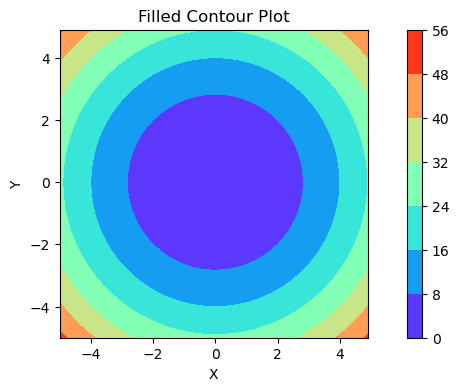

In [46]:
# Create a figure and axis objects
fig, ax2D = plt.subplots(1, 1, figsize=(10, 4))
# Plot the filled contour
contour = ax2D.contourf(xv, yv, zv, cmap='rainbow')

# Add a colorbar
cbar = plt.colorbar(contour,ax=ax2D)

# Add labels and title
ax2D.set_xlabel('X')
ax2D.set_ylabel('Y')
ax2D.set_title('Filled Contour Plot')
ax2D.set_aspect('equal')

# Show the plot
plt.show()


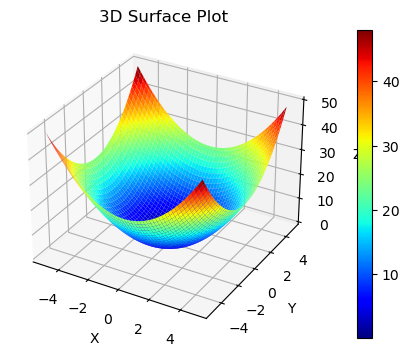

In [47]:
%matplotlib inline
# Create a figure and axis objects
fig, ax3D = plt.subplots(1, 1, figsize=(10, 4), subplot_kw={'projection': '3d'})

surf = ax3D.plot_surface(xv, yv,zv, cmap='jet')
# Add a colorbar
cbar = fig.colorbar(surf)

# Add labels and title
ax3D.set_xlabel('X')
ax3D.set_ylabel('Y')
ax3D.set_zlabel('Z')
ax3D.set_title('3D Surface Plot')
# Show the plot
plt.show()


In [5]:
%matplotlib inline

In [ ]:
# Define the fitness function to be optimized
def fitness_function(x):
    # Calculate the fitness value for a given particle position
    # This can be replaced with any other function based on the problem being solved
    dim = len(x)
    return NonlinearFunctions.sphere(x, dim)

class Particle:
    def __init__(self, min_x,max_x,dim,grp_id):
        # Initialize the particle with a random position and velocity
        self.min_x=min_x
        self.max_x=max_x
        self.dim = dim
        self.position = np.random.uniform(low=min_x, high=max_x, size=dim)
        self.velocity = np.random.uniform(low=min_x, high=max_x, size=dim)
        
        self.best_position = self.position.copy()
        self.best_fitness = fitness_function(self.position)
        
        self.group_id = grp_id

    def update_velocity(self, global_best_position, inertia_weight, cognitive_weight, social_weight):
        # Update the velocity of the particle based on the PSO equation
        #print(global_best_position)
        
        for d in range(self.dim):
            self.velocity[d] = (inertia_weight[self.group_id] * self.velocity[d]) + (cognitive_weight[self.group_id] * np.random.rand() * 
            (self.best_position[d] - self.position[d])) + (social_weight[self.group_id] * np.random.rand() * 
            (global_best_position[d] - self.position[d]))
        #print(self.velocity)
        
    def update_coefficients(self, t, T):
        w = [.7,.7,.7,.7]#[.9 + (((T-t))/T) * -.4,.9 + (((T-t))/T) * -.4,.9 + (((T-t))/T) * -.4,.9 + (((T-t))/T) * -.4]
        
        c1 = [1.95 - (2.0*t**(1/3))/(T**(1/3)),-(2.0*t**3)/T**3 + 2.5,
              1.95 - (2.0*t**(1/3))/(T**(1/3)),-(2.0*t**3)/T**3 + 2.5]
        c2 = [(2.0*t**(1/3))/(T**(1/3)) + 0.05,(2.0*t**3)/T**3 + 0.05,
              (2.0*t**3)/T**3 + 0.05,(2.0*t**(1/3))/(T**(1/3)) + 0.05]
        return w,c1,c2
            
            
    
    def clip_position(self):
        for j in range(self.dim):
            if self.position[j] < self.min_x:
                self.position[j]= self.min_x
            if self.position[j] > self.max_x:
                self.position[j]= self.max_x
    
    def update_position(self):
        # Update the position of the particle based on its velocity
        self.position = self.position + self.velocity
        self.clip_position()
        
    def evaluate_fitness(self):
        # Evaluate the fitness of the particle and update its best position if necessary
        fitness = fitness_function(self.position)
        if fitness < self.best_fitness:
            self.best_position = self.position.copy()
            self.best_fitness = fitness
    
    def update_coefficients2(self, t, T):
        w = [.5*((T-t))/T+.4]
        return w
        
def assign_dynamic_group(swarm,Ngrp):
    fitness_array=[]
    for particle in swarm:
        fitness_array.append(particle.best_fitness)
    fitness_array = np.array(fitness_array)
    fitness_sord_id = np.argsort(fitness_array)
    for i in range(fitness_sord_id.size):
        swarm[fitness_sord_id[i]].group_id = i%Ngrp
#all groups will have a similar range of fitnesses. 
    


def particle_swarm_optimization(dim, min_x,max_x,inc_x,num_particles, num_iterations, inertia_weight, 
                                cognitive_weight, social_weight,pso_type=0,
                                isplot=True,plot_every=4):
    """pso_type=0-Vanilla PSO,pso_type=1, autonomous group pso,pso_type=2,dynamic group pso"""
    # Initialize the swarm with random particles
    Ngrp = len(inertia_weight)
    if pso_type==0:
        swarm = [Particle(min_x,max_x,dim,0) for i in range(num_particles)]
    else:
        swarm = [Particle(min_x,max_x,dim,i%Ngrp) for i in range(num_particles)]
    if pso_type==2:
        assign_dynamic_group(swarm,Ngrp)

    # Initialize the global best position and fitness
    global_best_position = None
    global_best_fitness = float('inf')
    for particle in swarm:
        if particle.best_fitness < global_best_fitness:
            global_best_position = particle.best_position.copy()
            global_best_fitness = particle.best_fitness

    
    
    error_list=[]
    # Perform the optimization iterations
    for itrn in range(num_iterations):
        # Update the position and fitness of each particle
        
        for particle in swarm:
            if pso_type ==0:
                    inertia_weight = particle.update_coefficients2(itrn, num_iterations)
            if pso_type ==1 or pso_type ==2:
                inertia_weight, cognitive_weight, social_weight = particle.update_coefficients(itrn, num_iterations)
            particle.update_velocity(global_best_position, inertia_weight, cognitive_weight, social_weight)
            particle.update_position()
            particle.evaluate_fitness()
            # Update the global best position and fitness if necessary
            if particle.best_fitness < global_best_fitness:
                global_best_position = particle.best_position.copy()
                global_best_fitness = particle.best_fitness
        
        error_list.append(global_best_fitness)
        if pso_type==2:
                assign_dynamic_group(swarm,Ngrp)
        
        # Plotting True
        if isplot:
            # for plotting purpose
            x = np.arange(min_x,max_x,inc_x)
            y = np.arange(min_x,max_x,inc_x)
            xv, yv = np.meshgrid(x, y)
            zv = np.zeros((x.size,y.size))
            for i in range(x.size):
                for j in range(y.size):
                    zv[i][j]=fitness_function(np.array([xv[i][j],yv[i][j]]))
            if plot_every != 0 and itrn%plot_every == 0:
                # Create a figure and axis objects
                fig, ax2D = plt.subplots(1, 1, figsize=(10, 8))
                # Plot the filled contour
                contour = ax2D.contourf(xv, yv, zv, cmap='viridis')
                
                color_list=["green","blue","red","purple"] # increase the colorlist if we want to add more groups
                # Plotting the swarms
                for particle in swarm:
                    plt.plot(particle.position[0],particle.position[1],'o',ms=5,mec = 'w',mfc=color_list[particle.group_id])
                    plt.arrow(particle.position[0], particle.position[1], 0.5*particle.velocity[0], 0.5*particle.velocity[1], 
                              width = 0.05)
                
                plt.plot(global_best_position[0],global_best_position[1],'*',ms=10,mec = 'r',mfc='y')
                # Add a colorbar
                cbar = plt.colorbar(contour,ax=ax2D)

                # Add labels and title
                ax2D.set_xlim((min_x,max_x))
                ax2D.set_ylim((min_x,max_x))
                ax2D.set_xlabel('X')
                ax2D.set_ylabel('Y')
                ax2D.set_title('Iteration # '+str(itrn))
                ax2D.set_aspect('equal')

                # Show the plot
                plt.show()


    return global_best_position, global_best_fitness,error_list,pso_type

PSO_TYPES = ["Vanilla","Static-Group","Dynamic-Group"]

In [150]:
#all run at same time to compare
dim = 200  # Dimension of the problem
num_particles = 100  # Number of particles in the swarm
num_iterations = 1500  # Number of iterations
inertia_weight_0 = [0.9]  # Inertia weight for standard
cognitive_weight_0 = [2]  # Cognitive weight for standard
social_weight_0 = [2]  # Social weight for standard
inertia_weight_1 = [0.7,0.7,0.7,0.7]  # Inertia weight for groups
cognitive_weight_1 = [1.95, 2.5, 2.95, 2.5]  # Cognitive weight for groups
social_weight_1 = [0.05,0.05,0.05,0.05]  # Social weight for groups
min_xy=-100
max_xy=100
inc_xy=10 # For plotting purpose only
test_amount = 30
# Run PSO optimization

best_fitness_array = np.zeros((3,test_amount))
print("running")
print("rastrigin")
start_time = time.time()
for i in range(test_amount):
    time1 = time.time()
    #Standard
    best_position3, best_fitness3,error_list3,pso_type3 = particle_swarm_optimization(dim,min_xy,max_xy,inc_xy,num_particles, num_iterations, 
                                                              inertia_weight,cognitive_weight, social_weight,
                                                              pso_type=0,isplot=True,plot_every=0)
    
    #AG
    best_position2, best_fitness2,error_list2,pso_type2 = particle_swarm_optimization(dim,min_xy,max_xy,inc_xy,num_particles, num_iterations, 
                                                              inertia_weight_1,cognitive_weight_1, social_weight_1,
                                                              pso_type=1,isplot=True,plot_every=0)
    
    #DG
    best_position1, best_fitness1,error_list1,pso_type1 = particle_swarm_optimization(dim,min_xy,max_xy,inc_xy,num_particles, num_iterations, 
                                                              inertia_weight_1,cognitive_weight_1, social_weight_1,
                                                              pso_type=2,isplot=True,plot_every=0)
    best_fitness_array[2][i] = best_fitness3
    best_fitness_array[1][i] = best_fitness2
    best_fitness_array[0][i] = best_fitness1
    print(i)
    print(time.time()-time1)
    
    
print("done")
std2 = np.std(best_fitness_array[2])
std1 = np.std(best_fitness_array[1])
std0 = np.std(best_fitness_array[0])

mean2 = np.mean(best_fitness_array[2])
mean1 = np.mean(best_fitness_array[1])
mean0 = np.mean(best_fitness_array[0])

median2 = np.median(best_fitness_array[2])
median1 = np.median(best_fitness_array[1])
median0 = np.median(best_fitness_array[0])

end_time = time.time()
print(end_time-start_time)
table = [["Names","DG","AG","Standard"],
        ["Standard Deviation", std0, std1, std2],
         ["Average Best", mean0, mean1, mean2],
         ["Median Best", median0, median1, median2]]
print(tabulate(table))

running
rastrigin
0
189.98003697395325
1
189.61353707313538
done
379.6002552509308
------------------  ------------------  ------------------  ------------------
Names               DG                  AG                  Standard
Standard Deviation  123.86638559787492  183.06441899035417  4649.6460302893065
Average Best        268.70672683009036  1849.6734122342327  67433.35585315495
Median Best         268.70672683009036  1849.6734122342327  67433.35585315495
------------------  ------------------  ------------------  ------------------


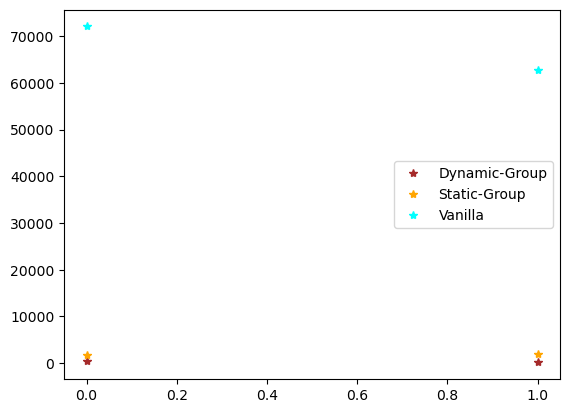

In [151]:
plt.plot(best_fitness_array[0],"*",color='brown',label=PSO_TYPES[pso_type1])
plt.plot(best_fitness_array[1],"*",color='orange',label= PSO_TYPES[pso_type2])
plt.plot(best_fitness_array[2],"*",color='cyan',label=PSO_TYPES[pso_type3])
plt.legend()
plt.show()